# Домашнее задание "Производная функции нескольких аргументов".

### Уровень 0:

Посчитайте частные производные функций:

1) $f(x,y)=2x^2y^3 + 1/x + y^2x + 7$, а для этой функции также градиент в точке $(1,2)$

2) $f(x,y)=x^2y - sin(xy) + cos(x^2) + 6y$

In [ ]:
import numpy as np
from sympy import diff, symbols, diff, cos, sin
from scipy.optimize import approx_fprime
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

*scipy*

In [ ]:
def f(x):
 return 2 * x[0]**2 * x[1]**3 + 1/x[0] + x[1]**2 * x[0] + 7
eps = np.sqrt(np.finfo(float).eps)
grad = approx_fprime([1, 2], f, [eps, eps])
print(f'Градиент функции в точке (1, 2) равен {grad}')

Градиент функции в точке (1, 2) равен [35.00000024 28.00000024]


*sympy*

In [ ]:
x, y = symbols('x y')
fx = 2 * x**2 * y**3 + 1/x + y**2 * x + 7
partialderiv_x = diff(fx, x).evalf(subs={x:1, y:2})
partialderiv_y = diff(fx, y).evalf(subs={x:1, y:2})
print(f'Градиент функции в точке (1, 2) равен ({partialderiv_x}, {partialderiv_y})')

Градиент функции в точке (1, 2) равен (35.0000000000000, 28.0000000000000)


*Частные производные*

In [ ]:
diff(2*x**2*y**3 + 1/x + x*y**2 + 7, x)

4*x*y**3 + y**2 - 1/x**2

In [ ]:
diff(2*x**2*y**3 + 1/x + x*y**2 + 7, y)

6*x**2*y**2 + 2*x*y

In [ ]:
diff(x**2*y - sin(x*y) + cos(x**2) + 6*y, x) 

2*x*y - 2*x*sin(x**2) - y*cos(x*y)

In [ ]:
diff(x**2*y - sin(x*y) + cos(x**2) + 6*y, y)

x**2 - x*cos(x*y) + 6

### Уровень 1:

Градиентный спуск своими руками:

In [ ]:
def f(x):
    return (x[0]**2) + (x[1]**2)

In [ ]:
x = np.array([100, 200])
learning_rate = 0.1

In [ ]:
values_array = x.reshape(1, 2)

for i in range(300):
 # Calculate gradient
 eps = np.sqrt(np.finfo(float).eps)
 grad = approx_fprime(x, f, [eps, eps])
 # Update x with gradient
 x = x - learning_rate * grad

 # Bonus
 values_array = np.concatenate((values_array, x.reshape(1,2)), axis=0)

In [ ]:
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f(x))

Минимум достигается в:  [-7.4505806e-09 -7.4505806e-09]
Значение функции в минимуме:  1.110223024625156e-16


*Проверка с помощью встроенной функции numpy:*

In [ ]:
np.gradient(x)

array([0., 0.])

*Или*

In [ ]:
minimize(f, x, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3


 final_simplex: (array([[-7.45058060e-09, -7.45058060e-09],
       [-7.82310963e-09, -7.45058060e-09],
       [-7.45058060e-09, -7.82310963e-09]]), array([1.11022302e-16, 1.16712195e-16, 1.16712195e-16]))
           fun: 1.110223024625156e-16
       message: 'Optimization terminated successfully.'
          nfev: 3
           nit: 1
        status: 0
       success: True
             x: array([-7.4505806e-09, -7.4505806e-09])

In [ ]:
initial_x = np.array([100, 200])
minimize(f, initial_x, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 85
         Function evaluations: 164


 final_simplex: (array([[ 3.31391559e-09, -1.82888492e-09],
       [-3.91522747e-09, -3.79451217e-09],
       [-4.97134432e-09,  7.91645290e-09]]), array([1.43268566e-17, 2.97273287e-17, 8.73844908e-17]))
           fun: 1.4326856592347756e-17
       message: 'Optimization terminated successfully.'
          nfev: 164
           nit: 85
        status: 0
       success: True
             x: array([ 3.31391559e-09, -1.82888492e-09])

*Бонус: визуализация*

In [ ]:
# Make x0 and x1 data
x0_data = np.linspace(start=-2, stop=2, num=200)
x1_data = np.linspace(start=-2, stop=2, num=200)
x0_data, x1_data = np.meshgrid(x0_data, x1_data)
values_array = np.clip(values_array, -2, 2)

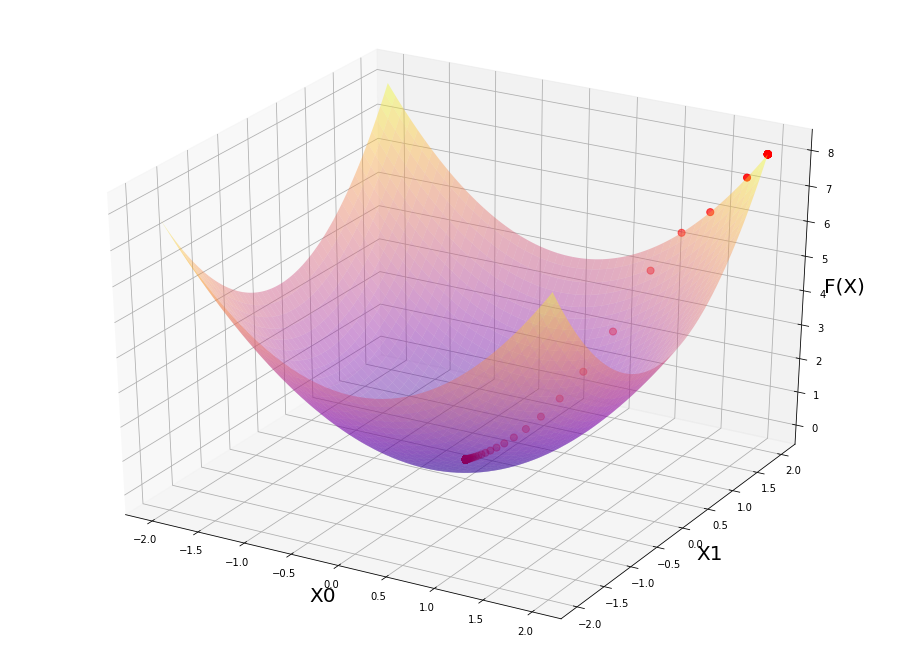

In [ ]:
# Generating 3d plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')
ax.set_xlabel('X0', fontsize=20)
ax.set_ylabel('X1', fontsize=20)
ax.set_zlabel('F(X)', fontsize=20)
ax.plot_surface(x0_data, x1_data, f(np.array([x0_data, x1_data])), cmap=
cm.plasma, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
 f(np.array([values_array[:, 0], values_array[:, 1]])), s=50,
color='red')
plt.show()